# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [153]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

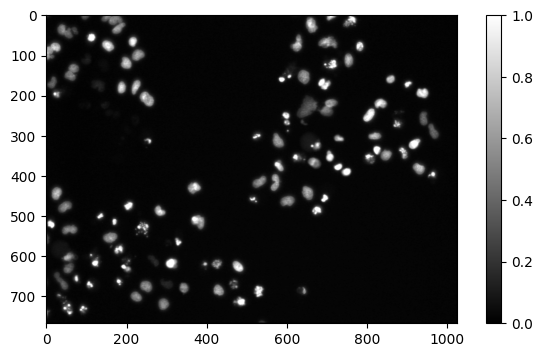

In [154]:
img = plt.imread('data/cells.png')
plt.figure(figsize=(7.5, 4))
plt.imshow(img, 'gray')
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

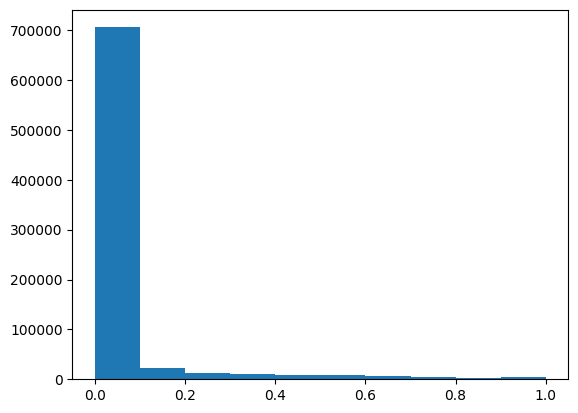

In [155]:
plt.hist(img.flatten())

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [156]:
T1 = 0.31
T2 = 0.59





### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

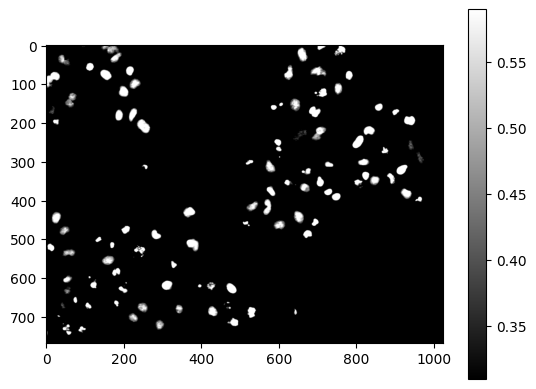

In [157]:
plt.imshow(img.clip(0.31, 0.59), 'gray')
plt.colorbar()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

In [158]:
img.shape[0]

768

In [159]:
img.shape[1]

1024

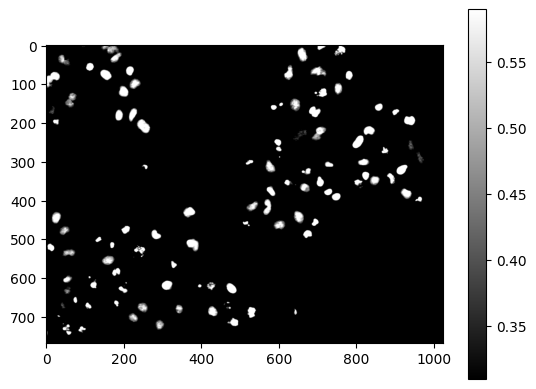

In [160]:


for x in range(0, 768):
    for y in range(0, 1024):
        if img[x, y] < 0.31:
            img[x, y] = 0.31
        elif img[x, y] > 0.59:
            img[x, y] = 0.59
        else:
            img[x, y] = img[x, y]
     

plt.imshow(img, 'gray')
plt.colorbar()



**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

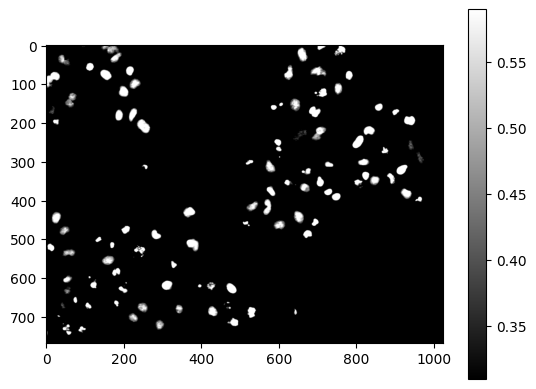

In [161]:

for p in numpy.ndindex(img.shape):
    if img[p[0], p[1]] < 0.31:
        img[p[0], p[1]] = 0.31
    elif img[p[0], p[1]] > 0.59:
        img[p[0], p[1]] = 0.59
    else:
        img[p[0], p[1]] = img[p[0], p[1]]

plt.imshow(img, 'gray')
plt.colorbar()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [162]:
def clip_image(img, T1, T2):
    result = img.copy()
    for p in numpy.ndindex(img.shape):
        if img[p[0], p[1]] < T1:
            img[p[0], p[1]] = T1
        elif img[p[0], p[1]] > T2:
            img[p[0], p[1]] = T2
        else:
            img[p[0], p[1]] = img[p[0], p[1]]       
    return result


**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [163]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()



Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

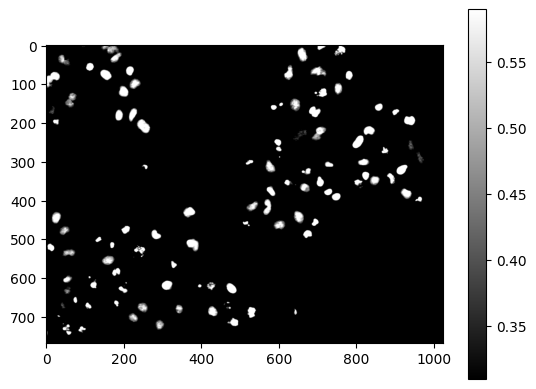

In [164]:
plt.imshow(clip_image(img, 0.2, 0.8), 'gray')
plt.colorbar()
# ab hier sind alle drei Ergebnisse falsch, da dasselbe wie bei 0.31 und 0.59 rauskommt

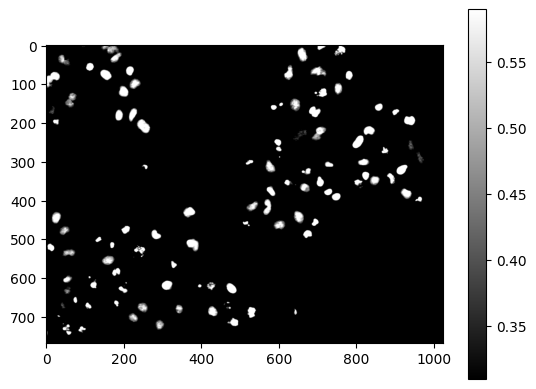

In [165]:

plt.imshow(clip_image(img, 0.3, 0.7), 'gray')
plt.colorbar()

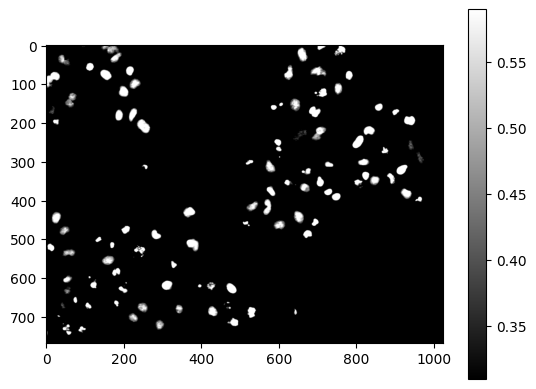

In [166]:

plt.imshow(clip_image(img, 0.4, 0.6), 'gray')
plt.colorbar()
